# Bayesian Network which can Infer that a person would get  Loan Approved or Not.

## Installing Required Library

In [5]:
!pip install pgmpy

In [3]:
!pip install networkx

## Import Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.estimators import BayesianEstimator
from pgmpy.sampling import BayesianModelSampling
from pgmpy.factors.discrete import State
from feature_engine.discretisation import EqualFrequencyDiscretiser
import networkx as nx
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
data = pd.read_csv("Loan Approval dataset.csv")

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 1. Pre-Processing the Data

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


I think Loan_Id is not that informative. so i am going to remove it.

In [5]:
data = data.drop("Loan_ID",axis=1)

In [6]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.shape

(614, 12)

There are 614 rows and 12 columns.

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Checking for Missing Values 

In [10]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we can observe that there are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History Variables.

## Treating Missing values

In [7]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [8]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

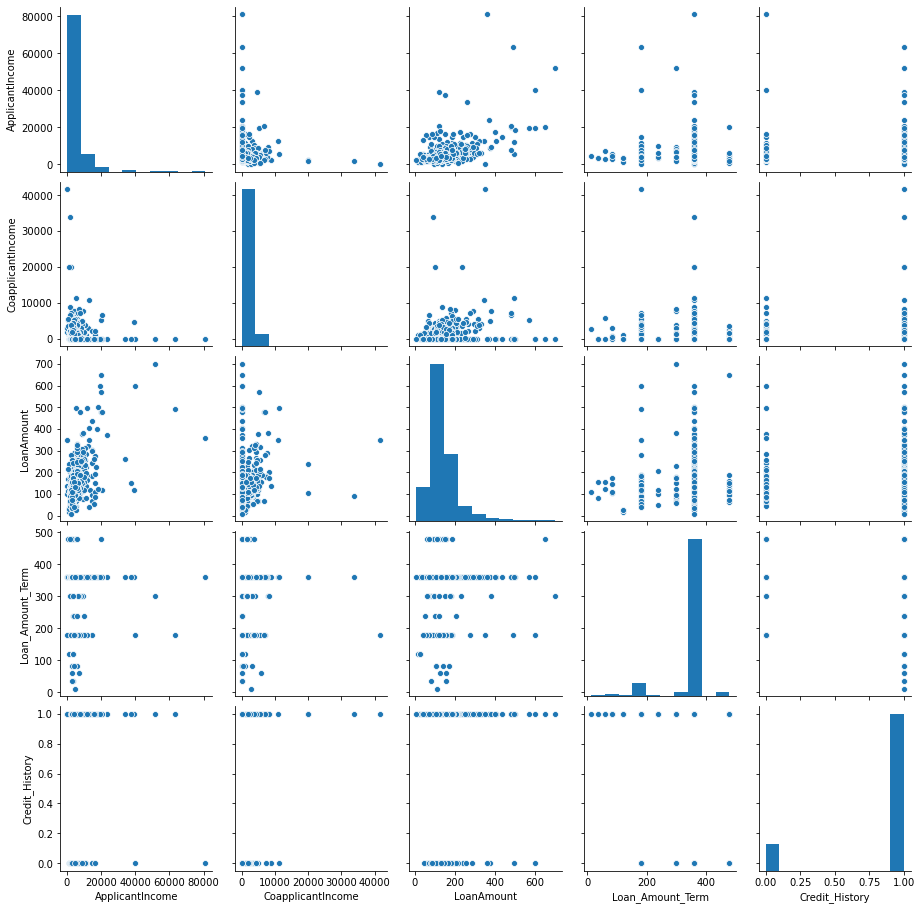

In [77]:
sns.pairplot(data)

In [13]:
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

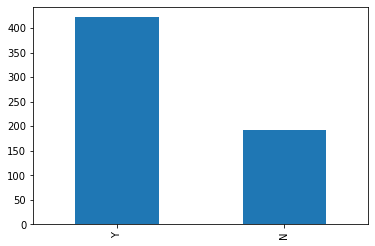

In [14]:
data['Loan_Status'].value_counts().plot(kind="bar")

In [9]:
### Lets say if a feature has more than 32 unique values, we will bin it
col_list = []
for col in data.columns:
    print(col, ": ", len(data[col].unique()))
    if(len(data[col].unique()) > 30):
        col_list.append(col)

Gender :  2
Married :  2
Dependents :  4
Education :  2
Self_Employed :  2
ApplicantIncome :  505
CoapplicantIncome :  287
LoanAmount :  203
Loan_Amount_Term :  10
Credit_History :  2
Property_Area :  3
Loan_Status :  2


In [10]:
col_list

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

These are three numerical features which needs to be binned

### ApplicantIncome Binned into Three bins 

In [13]:
### ApplicantIncome has min and max as 150 and 81000 respectively
min(data['ApplicantIncome'].unique()), max(data['ApplicantIncome'].unique())

(150, 81000)

In [14]:
bin_applicantincome = ['150 to 20,250', '20,250 to 40,500', '40,500 to 81000']

In [15]:
data['ApplicantIncome'] = pd.cut(data['ApplicantIncome'], 3, labels= bin_applicantincome)

In [16]:
data.ApplicantIncome.value_counts()

150 to 20,250       607
20,250 to 40,500      5
40,500 to 81000       2
Name: ApplicantIncome, dtype: int64

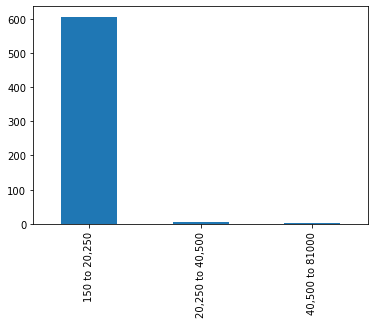

In [22]:
data.ApplicantIncome.value_counts().plot(kind="bar")

### CoapplicantIncome Binned into three bins

In [17]:
min(data['CoapplicantIncome'].unique()), max(data['CoapplicantIncome'].unique())

(0.0, 41667.0)

In [18]:
bin_coapplicantincome = ['0.0 to 10,416.75', '10,416.75 to 20,833.5', '20,833.5 to 41,667.0']

In [19]:
data['CoapplicantIncome'] = pd.cut(data['CoapplicantIncome'], 3, labels= bin_coapplicantincome)

In [20]:
data.CoapplicantIncome.value_counts()

0.0 to 10,416.75         610
20,833.5 to 41,667.0       2
10,416.75 to 20,833.5      2
Name: CoapplicantIncome, dtype: int64

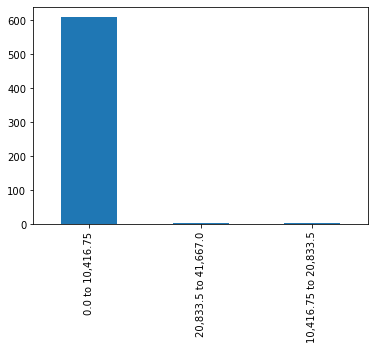

In [21]:
data.CoapplicantIncome.value_counts().plot(kind="bar")

### LoanAmount Binned into three bins

In [22]:
min(data['LoanAmount'].unique()), max(data['LoanAmount'].unique())

(9.0, 700.0)

In [23]:
bin_LoanAmount = ['9.0 to 175.0', '175.0 to 350.0', '350.0 to 700.0']

In [24]:
data['LoanAmount'] = pd.cut(data['LoanAmount'], 3, labels= bin_LoanAmount)

In [25]:
data.LoanAmount.value_counts()

9.0 to 175.0      556
175.0 to 350.0     46
350.0 to 700.0     12
Name: LoanAmount, dtype: int64

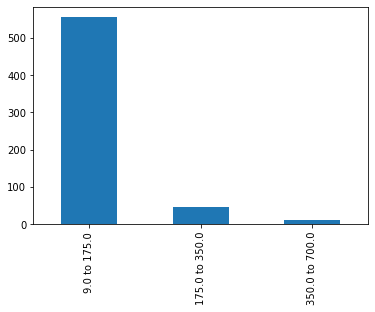

In [26]:
data.LoanAmount.value_counts().plot(kind="bar")

In [27]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,"150 to 20,250","0.0 to 10,416.75",9.0 to 175.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,"150 to 20,250","0.0 to 10,416.75",9.0 to 175.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,"150 to 20,250","0.0 to 10,416.75",9.0 to 175.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,"150 to 20,250","0.0 to 10,416.75",9.0 to 175.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,"150 to 20,250","0.0 to 10,416.75",9.0 to 175.0,360.0,1.0,Urban,Y


# 2. Building Bayesian Model

 A Bayesian network, Bayes network, belief network, Bayes(ian) model or probabilistic directed acyclic graphical model is a probabilistic graphical model 
(a type of statistical  model) that represents a set of random variables and their conditional dependencies via a directed acyclic graph (DAG). Bayesian networks are mostly used when we want to represent causal relationship between the random variables. Bayesian Networks are parameterized using Conditional Probability Distributions (CPD). Each node in the network is 
parameterized using $ P(node | Pa(node)) $ where $ Pa(node) $ represents the parents of node in the network.

In [28]:
model = BayesianModel([('Married', 'Gender'),
                     ('Dependents', 'Married'),
                     ('ApplicantIncome', 'LoanAmount'),
                     ('ApplicantIncome', 'Dependents'),
                     ('ApplicantIncome', 'Loan_Status'),
                     ('CoapplicantIncome', 'Loan_Status'),
                     ('CoapplicantIncome', 'Married'),
                     ('CoapplicantIncome', 'Property_Area'),
                     ('Education','Loan_Status'),
                     ('LoanAmount', 'Education'),
                     ('LoanAmount', 'Dependents'),
                     ('Credit_History', 'Loan_Status'),
                    ])

print("Nodes: ",model.nodes(),"\n")
print("Edges: ",model.edges())

Nodes:  ['Married', 'Gender', 'Dependents', 'ApplicantIncome', 'LoanAmount', 'Loan_Status', 'CoapplicantIncome', 'Property_Area', 'Education', 'Credit_History'] 

Edges:  [('Married', 'Gender'), ('Dependents', 'Married'), ('ApplicantIncome', 'LoanAmount'), ('ApplicantIncome', 'Dependents'), ('ApplicantIncome', 'Loan_Status'), ('LoanAmount', 'Education'), ('LoanAmount', 'Dependents'), ('CoapplicantIncome', 'Loan_Status'), ('CoapplicantIncome', 'Married'), ('CoapplicantIncome', 'Property_Area'), ('Education', 'Loan_Status'), ('Credit_History', 'Loan_Status')]


## Visualizing the Bayesian Network 

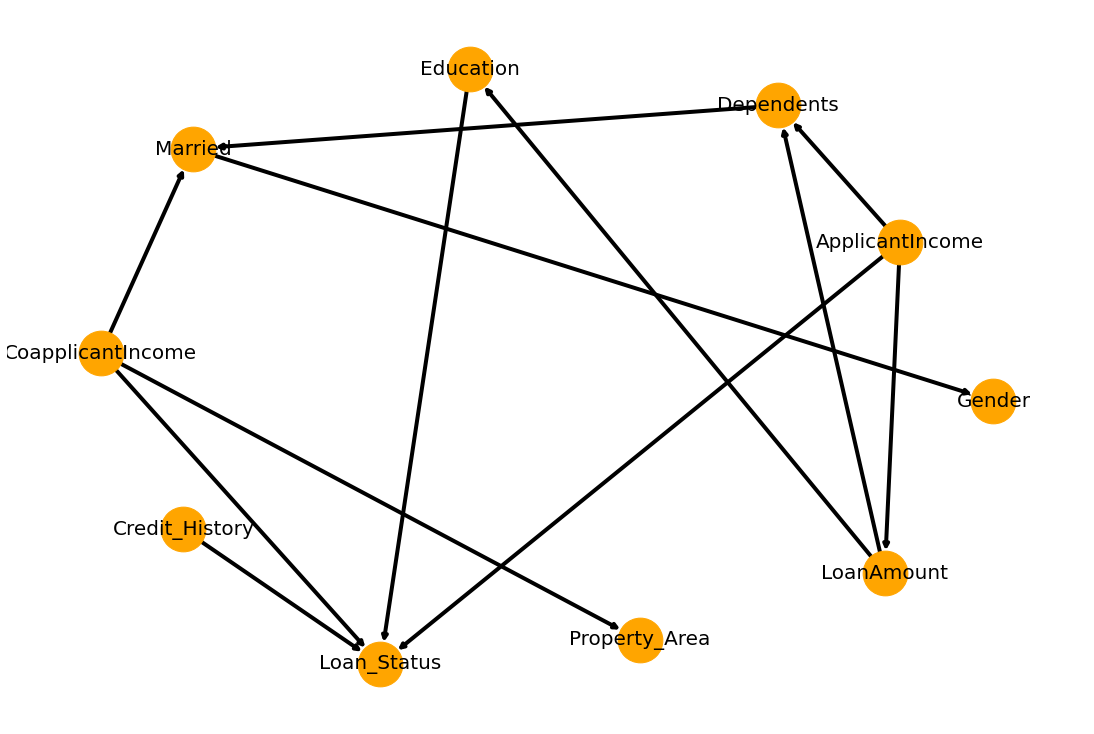

In [29]:
np.random.seed(47)
plt.figure(figsize=(15,10))
nx.draw(model, pos= nx.spring_layout(model), with_labels=True, node_size=2000, node_color="orange", width = 4, font_size = 20)
plt.show()

## Fitting the Model

In [30]:
model.fit(data,estimator=BayesianEstimator,prior_type='BDeu', equivalent_sample_size=10)

In [31]:
model.get_cpds()

[<TabularCPD representing P(Married:2 | CoapplicantIncome:3, Dependents:4) at 0x1a2781a1160>,
 <TabularCPD representing P(Gender:2 | Married:2) at 0x1a2781cbdc0>,
 <TabularCPD representing P(Dependents:4 | ApplicantIncome:3, LoanAmount:3) at 0x1a277fde760>,
 <TabularCPD representing P(ApplicantIncome:3) at 0x1a277e7a190>,
 <TabularCPD representing P(LoanAmount:3 | ApplicantIncome:3) at 0x1a2781b1a90>,
 <TabularCPD representing P(Loan_Status:2 | ApplicantIncome:3, CoapplicantIncome:3, Credit_History:2, Education:2) at 0x1a277fde7c0>,
 <TabularCPD representing P(CoapplicantIncome:3) at 0x1a277d64f70>,
 <TabularCPD representing P(Property_Area:3 | CoapplicantIncome:3) at 0x1a2781a1400>,
 <TabularCPD representing P(Education:2 | LoanAmount:3) at 0x1a277fde370>,
 <TabularCPD representing P(Credit_History:2) at 0x1a2781b1a60>]

# 3. Conditional Probability Distribution (CPD)

In [112]:
print(model.get_cpds("Married"))

+-------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+------------------------------------------+------------------------------------------+------------------------------------------+------------------------------------------+-----------------------------------------+-----------------------------------------+-----------------------------------------+-----------------------------------------+
| CoapplicantIncome | CoapplicantIncome(0.0 to 10,416.75) | CoapplicantIncome(0.0 to 10,416.75) | CoapplicantIncome(0.0 to 10,416.75) | CoapplicantIncome(0.0 to 10,416.75) | CoapplicantIncome(10,416.75 to 20,833.5) | CoapplicantIncome(10,416.75 to 20,833.5) | CoapplicantIncome(10,416.75 to 20,833.5) | CoapplicantIncome(10,416.75 to 20,833.5) | CoapplicantIncome(20,833.5 to 41,667.0) | CoapplicantIncome(20,833.5 to 41,667.0) | CoapplicantIncome(20,833.5 to 41,667.0) | CoapplicantInc

In [113]:
print(model.get_cpds("Gender"))

+----------------+---------------------+---------------------+
| Married        | Married(No)         | Married(Yes)        |
+----------------+---------------------+---------------------+
| Gender(Female) | 0.37844036697247707 | 0.08497536945812807 |
+----------------+---------------------+---------------------+
| Gender(Male)   | 0.6215596330275229  | 0.9150246305418719  |
+----------------+---------------------+---------------------+


In [114]:
print(model.get_cpds("Dependents"))

+-----------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+----------------------------------+----------------------------------+----------------------------------+
| ApplicantIncome | ApplicantIncome(150 to 20,250) | ApplicantIncome(150 to 20,250) | ApplicantIncome(150 to 20,250) | ApplicantIncome(20,250 to 40,500) | ApplicantIncome(20,250 to 40,500) | ApplicantIncome(20,250 to 40,500) | ApplicantIncome(40,500 to 81000) | ApplicantIncome(40,500 to 81000) | ApplicantIncome(40,500 to 81000) |
+-----------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------------+-----------------------------------+-----------------------------------+----------------------------------+----------------------------------+----------------------------------+
| Lo

In [115]:
print(model.get_cpds("ApplicantIncome"))

+-----------------------------------+------------+
| ApplicantIncome(150 to 20,250)    | 0.978098   |
+-----------------------------------+------------+
| ApplicantIncome(20,250 to 40,500) | 0.0133547  |
+-----------------------------------+------------+
| ApplicantIncome(40,500 to 81000)  | 0.00854701 |
+-----------------------------------+------------+


In [116]:
print(model.get_cpds("LoanAmount"))

+----------------------------+--------------------------------+-----------------------------------+----------------------------------+
| ApplicantIncome            | ApplicantIncome(150 to 20,250) | ApplicantIncome(20,250 to 40,500) | ApplicantIncome(40,500 to 81000) |
+----------------------------+--------------------------------+-----------------------------------+----------------------------------+
| LoanAmount(175.0 to 350.0) | 0.07391225195703624            | 0.2533333333333333                | 0.3958333333333333               |
+----------------------------+--------------------------------+-----------------------------------+----------------------------------+
| LoanAmount(350.0 to 700.0) | 0.0165665392317495             | 0.3733333333333333                | 0.3958333333333333               |
+----------------------------+--------------------------------+-----------------------------------+----------------------------------+
| LoanAmount(9.0 to 175.0)   | 0.9095212088112143      

In [118]:
print(model.get_cpds("CoapplicantIncome"))

+------------------------------------------+------------+
| CoapplicantIncome(0.0 to 10,416.75)      | 0.982906   |
+------------------------------------------+------------+
| CoapplicantIncome(10,416.75 to 20,833.5) | 0.00854701 |
+------------------------------------------+------------+
| CoapplicantIncome(20,833.5 to 41,667.0)  | 0.00854701 |
+------------------------------------------+------------+


In [119]:
print(model.get_cpds("Property_Area"))

+--------------------------+-------------------------------------+------------------------------------------+-----------------------------------------+
| CoapplicantIncome        | CoapplicantIncome(0.0 to 10,416.75) | CoapplicantIncome(10,416.75 to 20,833.5) | CoapplicantIncome(20,833.5 to 41,667.0) |
+--------------------------+-------------------------------------+------------------------------------------+-----------------------------------------+
| Property_Area(Rural)     | 0.29365942028985503                 | 0.20833333333333331                      | 0.20833333333333331                     |
+--------------------------+-------------------------------------+------------------------------------------+-----------------------------------------+
| Property_Area(Semiurban) | 0.38007246376811593                 | 0.3958333333333333                       | 0.20833333333333331                     |
+--------------------------+-------------------------------------+----------------------

In [120]:
print(model.get_cpds("Education"))

+-------------------------+----------------------------+----------------------------+--------------------------+
| LoanAmount              | LoanAmount(175.0 to 350.0) | LoanAmount(350.0 to 700.0) | LoanAmount(9.0 to 175.0) |
+-------------------------+----------------------------+----------------------------+--------------------------+
| Education(Graduate)     | 0.9459459459459459         | 0.891304347826087          | 0.7592371871275327       |
+-------------------------+----------------------------+----------------------------+--------------------------+
| Education(Not Graduate) | 0.054054054054054064       | 0.10869565217391305        | 0.2407628128724672       |
+-------------------------+----------------------------+----------------------------+--------------------------+


In [121]:
print(model.get_cpds("Credit_History"))

+---------------------+----------+
| Credit_History(0.0) | 0.150641 |
+---------------------+----------+
| Credit_History(1.0) | 0.849359 |
+---------------------+----------+


In [122]:
print(model.get_cpds("Loan_Status"))

+-------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+------------------------------------------+------------------------------------------+------------------------------------------+------------------------------------------+-----------------------------------------+-----------------------------------------+-----------------------------------------+-----------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+-------------------------------------+------------------------------------------+------------------------------------------+------------------------------------------+------------------------------------------+-----------------------------------------+-----------------------------------------+-----------------------------------------+-------------------------------------

# 4. Independences

In [134]:
print("Independencies :",model.local_independencies("Married"))
print("Married Descendants :",model.get_children("Married"))

Independencies : (Married ⟂ Education, LoanAmount, Property_Area, Loan_Status, ApplicantIncome, Credit_History | Dependents, CoapplicantIncome)
Married Descendant : ['Gender']


In [45]:
print("Independencies :",model.local_independencies("Gender"))
print("Gender Descendants :",model.get_children("Gender"))

Independencies : (Gender ⟂ CoapplicantIncome, Loan_Status, Dependents, Property_Area, Education, LoanAmount, Credit_History, ApplicantIncome | Married)
Gender Descendants : []


In [46]:
print("Independencies :",model.local_independencies("Dependents"))
print("Dependents Descendants :",model.get_children("Dependents"))

Independencies : (Dependents ⟂ CoapplicantIncome, Loan_Status, Credit_History, Property_Area, Education | ApplicantIncome, LoanAmount)
Dependents Descendants : ['Married']


In [47]:
print("Independencies :",model.local_independencies("ApplicantIncome"))
print("ApplicantIncome Descendants :",model.get_children("ApplicantIncome"))

Independencies : (ApplicantIncome ⟂ CoapplicantIncome, Property_Area, Credit_History)
ApplicantIncome Descendants : ['LoanAmount', 'Dependents', 'Loan_Status']


In [44]:
print("Independencies :",model.local_independencies("LoanAmount"))
print("LoanAmount Descendants :",model.get_children("LoanAmount"))

Independencies : (LoanAmount ⟂ CoapplicantIncome, Property_Area, Credit_History | ApplicantIncome)
LoanAmount Descendants : ['Education', 'Dependents']


In [43]:
print("Independencies :",model.local_independencies("CoapplicantIncome"))
print("CoapplicantIncome Descendants :",model.get_children("CoapplicantIncome"))

Independencies : (CoapplicantIncome ⟂ LoanAmount, Dependents, Credit_History, Education, ApplicantIncome)
CoapplicantIncome Descendants : ['Loan_Status', 'Married', 'Property_Area']


In [42]:
print("Independencies :",model.local_independencies("Property_Area"))
print("Property_Area Descendants :",model.get_children("Property_Area"))

Independencies : (Property_Area ⟂ Loan_Status, Dependents, Education, Married, LoanAmount, Gender, Credit_History, ApplicantIncome | CoapplicantIncome)
Property_Area Descendants : []


In [41]:
print("Independencies :",model.local_independencies("Education"))
print("Education Descendants :",model.get_children("Education"))

Independencies : (Education ⟂ CoapplicantIncome, Married, Gender, Dependents, Credit_History, Property_Area, ApplicantIncome | LoanAmount)
Education Descendants : ['Loan_Status']


In [40]:
print("Independencies :",model.local_independencies("Credit_History"))
print("Credit_History Descendants :",model.get_children("Credit_History"))

Independencies : (Credit_History ⟂ CoapplicantIncome, Dependents, Property_Area, Education, Married, LoanAmount, Gender, ApplicantIncome)
Credit_History Descendants : ['Loan_Status']


In [39]:
print("Independencies :",model.local_independencies("Loan_Status"))
print("Loan_Status Descendants :",model.get_children("Loan_Status"))

Independencies : (Loan_Status ⟂ Married, Gender, Dependents, LoanAmount, Property_Area | CoapplicantIncome, Education, ApplicantIncome, Credit_History)
Loan_Status Descendants : []


# 5. Markov Blanket 

## Displaying Markov Blanket

In [47]:
nodes = list(model.nodes())
edges = list(model.edges())
leaves = model.get_leaves()
markov_blanket = {}
DAG = nx.DiGraph()
DAG.add_edges_from(edges)
pos = nx.spring_layout(DAG) 
np.random.seed(47)

def Display_MarkovBlanket(node):
    plt.figure(figsize=(10,8))
    markov_blanket[node] = model.get_markov_blanket(node)
    print(node, markov_blanket[node])    
    nx.draw_networkx_nodes(DAG, pos, nodelist=[node], node_size=2000, node_color="orange", width = 4, font_size = 20)
    nx.draw_networkx_nodes(DAG, pos, nodelist=markov_blanket[node], node_size=2000, node_color="yellow", width = 4, font_size = 20)
    nx.draw_networkx_nodes(DAG, pos, nodelist = [n for n in nodes if n not in markov_blanket[node] and n != node], node_size=2000, node_color="grey", width = 4, font_size = 20)
    nx.draw_networkx_labels(DAG, pos)
    nx.draw_networkx_labels(DAG, pos)
    nx.draw_networkx_edges(DAG, pos, edge_color='black',width=3)
    plt.show()  

### Q1. Markov Blanket for "Education" ?

In [48]:
model.get_markov_blanket("Education")

['Credit_History',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Status',
 'LoanAmount']

Markov Blanket of "Education" are Loan_status, ApplicantIncome, Credit_History, CoapplicantIncome, LoanAmount

Education ['Credit_History', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Status', 'LoanAmount']


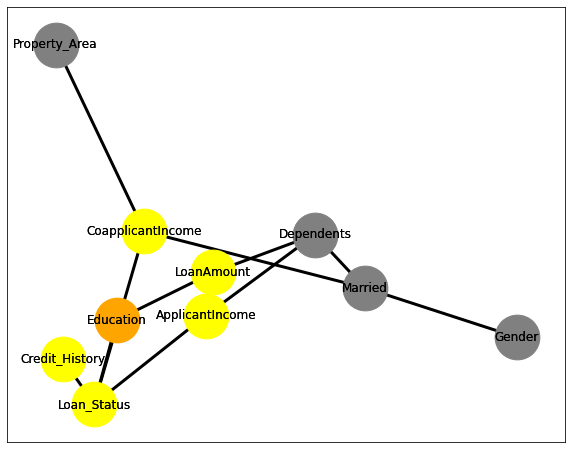

In [49]:
Display_MarkovBlanket("Education")

### Q2. Markov Blanket for "LoanAmount" ?

In [50]:
model.get_markov_blanket("LoanAmount")

['Education', 'ApplicantIncome', 'Dependents']

Markov Blanket of "LoanAmount" are Dependents, Education , ApplicantIncome

LoanAmount ['Education', 'ApplicantIncome', 'Dependents']


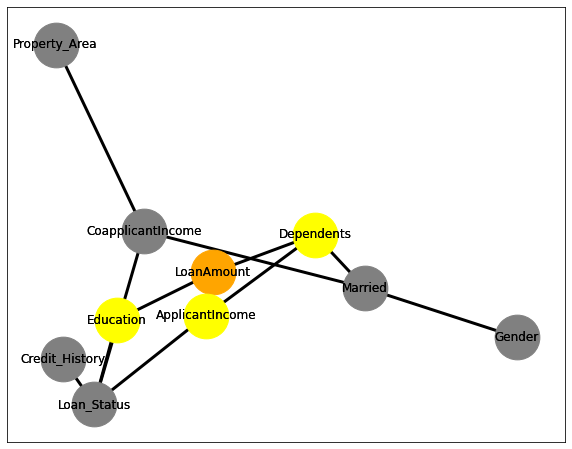

In [51]:
Display_MarkovBlanket("LoanAmount")

### Q3. Markov Blanket for "Credit_History" ?

In [52]:
model.get_markov_blanket("Credit_History")

['Education', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Status']

Markov Blanket of "Credit_History" are Education , ApplicantIncome, CoapplicantIncome, Loan_Status

Credit_History ['Education', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Status']


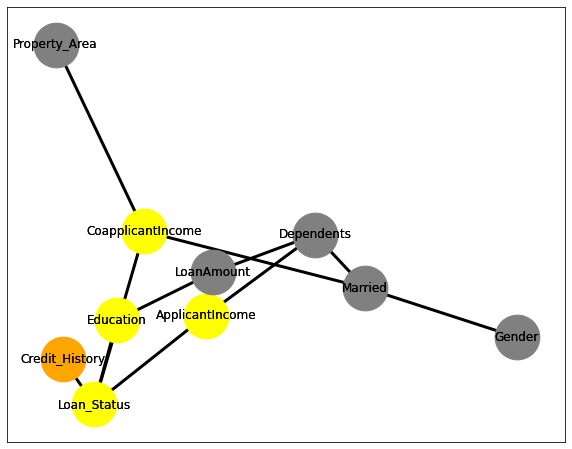

In [53]:
Display_MarkovBlanket("Credit_History")

### Q4. Markov Blanket for "ApplicantIncome" ?

In [54]:
model.get_markov_blanket("ApplicantIncome")

['Education',
 'Dependents',
 'Credit_History',
 'CoapplicantIncome',
 'Loan_Status',
 'LoanAmount']

Markov Blanket of "ApplicantIncome" are Education , ApplicantIncome, CoapplicantIncome, Loan_Status, Credit_History, Dependents

ApplicantIncome ['Education', 'Dependents', 'Credit_History', 'CoapplicantIncome', 'Loan_Status', 'LoanAmount']


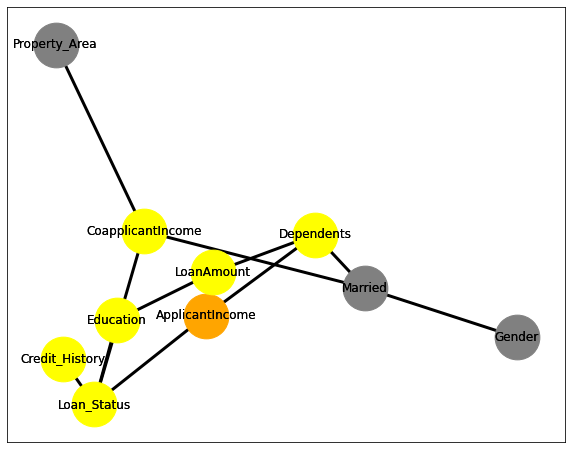

In [55]:
Display_MarkovBlanket("ApplicantIncome")

### Q5. Markov Blanket for "Loan_Status" ?

In [56]:
model.get_markov_blanket("Loan_Status")

['Education', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome']

Markov Blanket of "Loan_Status" are Education , ApplicantIncome, CoapplicantIncome, Loan_Status, Credit_History, Dependents

Loan_Status ['Education', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome']


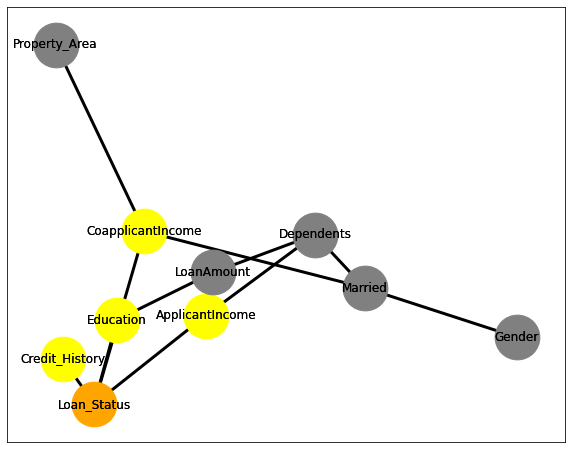

In [57]:
Display_MarkovBlanket("Loan_Status")

# 6. Reasoning Patterns and Active Trails 

## Q1. Is there is any active trail between Education and LoanAmount ?

In [191]:
model.is_dconnected("Education","LoanAmount")

True

There is active trail between Education and LoanAmount. So Education and LoanAmount are Not Independent.

## Q2. Is there is any active trail between Loan_Status and Credit_History ?

In [192]:
model.is_dconnected("Loan_Status","Credit_History")

True

There is active trail between Loan_Status and Credit_History. So Loan_Status and Credit_History are Not Independent.

## Q3. Is there is any active trail between PropertyArea and Gender ?

In [196]:
model.is_dconnected("Property_Area","LoanAmount")

False

There is no active trail between Property_Area and LoanAmount. So Property_Area and LoanAmount are Independent of each other.

## 6.1 Causal reasoning (Prediction)

### Q1. Do Tony get Loan Approved without any Evidence?

In [33]:
infer = VariableElimination(model)
print(infer.query(variables=['Loan_Status']))

Eliminating: ApplicantIncome: 100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 309.91it/s]

+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.3195 |
+----------------+--------------------+
| Loan_Status(Y) |             0.6805 |
+----------------+--------------------+


There is 68% of chance that Tony will get Loan Approved.

### Q2. Do Tony get  Loan Approved with given Evidence he is "Graduate" and his Credit Score is 1.0 and his income is between 40,500 to 81000 ?

In [34]:
print(infer.query(variables=['Loan_Status'],evidence={'Education':'Graduate','ApplicantIncome':'40,500 to 81000','Credit_History':1.0}))

Eliminating: CoapplicantIncome: 100%|███████████████████████████████████████████████████| 1/1 [00:00<00:00, 247.80it/s]

+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.1154 |
+----------------+--------------------+
| Loan_Status(Y) |             0.8846 |
+----------------+--------------------+


There is 88% of chance that Tony will get Loan Approved.

## 6.2 Evdential Reasoning (Explaining) 

### Q1. Is Tony is a Graduate given that he got Loan Approved ? 

In [37]:
print(infer.query(variables=['Education'],evidence={'Loan_Status':"Y"}))

Eliminating: ApplicantIncome: 100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 500.08it/s]

+-------------------------+------------------+
| Education               |   phi(Education) |
+=========================+==================+
| Education(Graduate)     |           0.7909 |
+-------------------------+------------------+
| Education(Not Graduate) |           0.2091 |
+-------------------------+------------------+


There is 79% of chance that Tony is Graduated given evidence that he got Loan Approved. 

### Q2. Is Tony is Married given that he got Loan Approved ? 

In [42]:
print(infer.query(variables=['Married'],evidence={'Loan_Status':"Y"}))

Eliminating: CoapplicantIncome: 100%|███████████████████████████████████████████████████| 6/6 [00:00<00:00, 351.28it/s]

+--------------+----------------+
| Married      |   phi(Married) |
+==============+================+
| Married(No)  |         0.3459 |
+--------------+----------------+
| Married(Yes) |         0.6541 |
+--------------+----------------+


There is 65% of chance that Tony is Married given evidence that he got Loan Approved. May be his wife is also working and earning money.  

# 7. Inference 

## 7.1 Variable Elimination

In [57]:
infer = VariableElimination(model)

## Joint Distribtion

In [398]:
print(infer.query(variables=['Loan_Status','Education'], joint= True))

Eliminating: Credit_History: 100%|██████████████████████████████████████████████████████| 3/3 [00:00<00:00, 750.64it/s]

+----------------+-------------------------+------------------------------+
| Loan_Status    | Education               |   phi(Loan_Status,Education) |
+================+=========================+==============================+
| Loan_Status(N) | Education(Graduate)     |                       0.2663 |
+----------------+-------------------------+------------------------------+
| Loan_Status(N) | Education(Not Graduate) |                       0.0488 |
+----------------+-------------------------+------------------------------+
| Loan_Status(Y) | Education(Graduate)     |                       0.5992 |
+----------------+-------------------------+------------------------------+
| Loan_Status(Y) | Education(Not Graduate) |                       0.0857 |
+----------------+-------------------------+------------------------------+


## Conditional Distribution

In [362]:
print(infer.query(['Loan_Status']))

Eliminating: Credit_History: 100%|██████████████████████████████████████████████████████| 5/5 [00:00<00:00, 500.00it/s]

+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.3195 |
+----------------+--------------------+
| Loan_Status(Y) |             0.6805 |
+----------------+--------------------+


## Trying with multiple values of Education variable

In [59]:
for i in data.Education.unique():
    print("Education:", i)
    print(infer.query(variables=['Loan_Status'], evidence = {'Education': i}))
    print("\n")

Eliminating: ApplicantIncome: 100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.77it/s]

Education: Graduate
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.3075 |
+----------------+--------------------+
| Loan_Status(Y) |             0.6925 |
+----------------+--------------------+


Education: Not Graduate
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.3613 |
+----------------+--------------------+
| Loan_Status(Y) |             0.6387 |
+----------------+--------------------+




*Loan_Status given Education = "Graduate" has high chance to get Loan Apporved.*

## Trying with multiple values of Credit History variable

In [60]:
for i in data.Credit_History.unique():
    print("Credit History:", i)
    print(infer.query(variables=['Loan_Status'], evidence = {'Credit_History': i}))
    print("\n")

Eliminating: ApplicantIncome: 100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 499.96it/s]

Credit History: 1.0
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.2152 |
+----------------+--------------------+
| Loan_Status(Y) |             0.7848 |
+----------------+--------------------+


Credit History: 0.0
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.9073 |
+----------------+--------------------+
| Loan_Status(Y) |             0.0927 |
+----------------+--------------------+




*Loan_Status given Credit History = 1.0 has high chance to get Loan Apporved.*

## Trying with multiple values of ApplicantIncome variable

In [62]:
for i in data.ApplicantIncome.unique():
    print("Applicant Income:", i)
    print(infer.query(variables=['Loan_Status'], evidence = {'ApplicantIncome': i}))
    print("\n")

Eliminating: Credit_History: 100%|██████████████████████████████████████████████████████| 4/4 [00:00<00:00, 380.68it/s]

Applicant Income: 150 to 20,250
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.3205 |
+----------------+--------------------+
| Loan_Status(Y) |             0.6795 |
+----------------+--------------------+


Applicant Income: 20,250 to 40,500
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.2834 |
+----------------+--------------------+
| Loan_Status(Y) |             0.7166 |
+----------------+--------------------+


Applicant Income: 40,500 to 81000
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.2621 |
+----------------+--------------------+
| Loan_Status(Y) |             0.7379 |
+----------------+--------------------+




*Loan_Status given Applicant Income = 40,500 to 81000 has high chance to get Loan Apporved.*

## Trying with multiple values of CoapplicantIncome variable

In [63]:
for i in data.CoapplicantIncome.unique():
    print("Coapplicant Income:", i)
    print(infer.query(variables=['Loan_Status'], evidence = {'CoapplicantIncome': i}))
    print("\n")

Eliminating: ApplicantIncome: 100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 333.45it/s]

Coapplicant Income: 0.0 to 10,416.75
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.3139 |
+----------------+--------------------+
| Loan_Status(Y) |             0.6861 |
+----------------+--------------------+


Coapplicant Income: 10,416.75 to 20,833.5
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.5000 |
+----------------+--------------------+
| Loan_Status(Y) |             0.5000 |
+----------------+--------------------+


Coapplicant Income: 20,833.5 to 41,667.0
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.7827 |
+----------------+--------------------+
| Loan_Status(Y) |             0.2173 |
+----------------+--------------------+




*Loan_Status given Coapplicant Income: 0.0 to 10,416.75 has high chance to get Loan Apporved.*

## Trying with multiple values of LoanAmount variable

In [69]:
for i in data.LoanAmount.unique():
    print("Loan Amount:", i)
    print(infer.query(variables=['Loan_Status'], evidence = {'LoanAmount': i}))
    print("\n")

Eliminating: ApplicantIncome: 100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 501.07it/s]

Loan Amount: 9.0 to 175.0
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.3212 |
+----------------+--------------------+
| Loan_Status(Y) |             0.6788 |
+----------------+--------------------+


Loan Amount: 175.0 to 350.0
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.3069 |
+----------------+--------------------+
| Loan_Status(Y) |             0.6931 |
+----------------+--------------------+


Loan Amount: 350.0 to 700.0
+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.2990 |
+----------------+--------------------+
| Loan_Status(Y) |             0.7010 |
+----------------+--------------------+




*Loan_Status given Loan Amount: 350.0 to 700.0 has high chance to get Loan Apporved.*

## Trying with Multiple Variables as Evidence

In [366]:
print(infer.query(['Loan_Status'], evidence={'Education':'Graduate'}))

Eliminating: Credit_History: 100%|██████████████████████████████████████████████████████| 4/4 [00:00<00:00, 667.14it/s]

+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.3075 |
+----------------+--------------------+
| Loan_Status(Y) |             0.6925 |
+----------------+--------------------+


*Loan_Status given Education = Graduate has 69% chance to get Loan Apporved.*

In [369]:
print(infer.query(['Loan_Status'], evidence={'Education':'Graduate','ApplicantIncome':'40,500 to 81000'}))

Eliminating: Credit_History: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 999.48it/s]

+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.2313 |
+----------------+--------------------+
| Loan_Status(Y) |             0.7687 |
+----------------+--------------------+



*Loan_Status given Education = Graduate and ApplicantIncome = 40,500 to 81000 has 76.87% chance to get Loan Apporved.*

In [374]:
print(infer.query(['Loan_Status'], evidence={'Education':'Graduate','ApplicantIncome':'40,500 to 81000','CoapplicantIncome':'0.0 to 10,416.75'}))

Eliminating: Credit_History: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1001.27it/s]

+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.2266 |
+----------------+--------------------+
| Loan_Status(Y) |             0.7734 |
+----------------+--------------------+


*Loan_Status given Education = Graduate, ApplicantIncome = 40,500 to 81000 and CoapplicantIncome = 0.0 to 10,416.75 has 77.34% chance to get Loan Apporved.*

In [380]:
print(infer.query(['Loan_Status'], evidence={'Education':'Graduate','ApplicantIncome':'40,500 to 81000','CoapplicantIncome':'0.0 to 10,416.75','Credit_History':1.0}))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.1087 |
+----------------+--------------------+
| Loan_Status(Y) |             0.8913 |
+----------------+--------------------+


*Loan_Status given Education = Graduate, ApplicantIncome = 40,500 to 81000, CoapplicantIncome = 0.0 to 10,416.75 and Credit_History = 1.0 has 89.13% chance to get Loan Apporved.*

In [381]:
print(infer.query(['Loan_Status'], evidence={'Education':'Graduate','ApplicantIncome':'40,500 to 81000','CoapplicantIncome':'0.0 to 10,416.75','Credit_History':0.0}))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.8913 |
+----------------+--------------------+
| Loan_Status(Y) |             0.1087 |
+----------------+--------------------+


*Loan_Status given Education = Graduate, ApplicantIncome = 40,500 to 81000, CoapplicantIncome = 0.0 to 10,416.75 and Credit_History = 0.0 has 89.13% chance to not get Loan Apporved.*

Here we can observe that Credit History has huge Impact on getting Loan Approved 

In [71]:
print(infer.query(['Loan_Status'], evidence={'Education':'Graduate','ApplicantIncome':'40,500 to 81000','CoapplicantIncome':'0.0 to 10,416.75','Credit_History':1.0,'LoanAmount': '350.0 to 700.0'}))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----------------+--------------------+
| Loan_Status    |   phi(Loan_Status) |
+================+====================+
| Loan_Status(N) |             0.1087 |
+----------------+--------------------+
| Loan_Status(Y) |             0.8913 |
+----------------+--------------------+


*Loan_Status given Education = Graduate, ApplicantIncome = 40,500 to 81000, CoapplicantIncome = 0.0 to 10,416.75, Credit_History = 1.0 and LoanAmount = 350.0 to 700.0  has 89.13% chance to get Loan Apporved.*

Here we can observe there is no impact with LoanAmount to get Loan Approved

## Conclusion

Loan_Status given Education = Graduate, ApplicantIncome = 40,500 to 81000, CoapplicantIncome = 0.0 to 10,416.75 and Credit_History = 1.0 has 89.13% chance to get Loan Apporved.


There is nearly 90% of chance to get Loan Approved with these Evidence.


A person who graduated in master degree and earning 40,500 to 81000 euros and his wife who has income of 0 to 10,416.75 euros and has Credit History of 1.0 has nearly 90% chance to get Loan Approved.


# 8. Sampling 

There are two Sampling techniques I have used in this Notebook they are Rejection sampling and Likelihood weighting sampling that are based on inference by stochastic simulation drawing N samples from a sampling distribution and compute an approximate posterior probability.

# 8.1 Rejection Sampling

The rejection sampling method is to reject those samples that disagree with the given evidence of the query and compute the probability as a mean of the samples.


### Q1)  Query -> Loan_Status: Y

###                      Evidence -> Education: Graduate

In [77]:
inference = BayesianModelSampling(model)

In [81]:
evidence = [State(var='Education',state='Graduate')]

In [90]:
sample_data = inference.rejection_sample(evidence=evidence, size=200)
sample_data

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]C:\Users\karth\anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:521: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warn(
100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 7689.83it/s]


,Married,Gender,Dependents,ApplicantIncome,LoanAmount,Loan_Status,CoapplicantIncome,Property_Area,Education,Credit_History
0,No,Female,0,"150 to 20,250",175.0 to 350.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
1,Yes,Male,0,"150 to 20,250",9.0 to 175.0,N,"0.0 to 10,416.75",Semiurban,Graduate,1.0
2,Yes,Male,2,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
3,Yes,Female,1,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
4,Yes,Female,2,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
...,...,...,...,...,...,...,...,...,...,...
195,No,Male,0,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
196,No,Male,0,"150 to 20,250",175.0 to 350.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
197,Yes,Male,2,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
198,Yes,Male,0,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0


## Calculating the Probabilties from Samples

## Formula: $ \frac{ Number -of -times -Query -and  -Evidence -Variable -occurs } { Number  -of  -times  -Evidence -occurs }$

### Query -> Loan_Status: Y

###                      Evidence -> Education: Graduate

In [103]:
sample_data[(sample_data.Loan_Status == "Y") & (sample_data.Education == "Graduate")]

,Married,Gender,Dependents,ApplicantIncome,LoanAmount,Loan_Status,CoapplicantIncome,Property_Area,Education,Credit_History
0,No,Female,0,"150 to 20,250",175.0 to 350.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
1,Yes,Male,0,"150 to 20,250",9.0 to 175.0,N,"0.0 to 10,416.75",Semiurban,Graduate,1.0
2,Yes,Male,2,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
3,Yes,Female,1,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
4,Yes,Female,2,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
...,...,...,...,...,...,...,...,...,...,...
195,No,Male,0,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
196,No,Male,0,"150 to 20,250",175.0 to 350.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
197,Yes,Male,2,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
198,Yes,Male,0,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0


In [117]:
sample_data[sample_data.Education == "Graduate"]

,Married,Gender,Dependents,ApplicantIncome,LoanAmount,Loan_Status,CoapplicantIncome,Property_Area,Education,Credit_History
0,No,Female,0,"150 to 20,250",175.0 to 350.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
1,Yes,Male,0,"150 to 20,250",9.0 to 175.0,N,"0.0 to 10,416.75",Semiurban,Graduate,1.0
2,Yes,Male,2,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
3,Yes,Female,1,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
4,Yes,Female,2,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
...,...,...,...,...,...,...,...,...,...,...
195,No,Male,0,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
196,No,Male,0,"150 to 20,250",175.0 to 350.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
197,Yes,Male,2,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
198,Yes,Male,0,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0


In [115]:
Numerator = len(sample_data[(sample_data.Loan_Status == "Y") & (sample_data.Education == "Graduate")])

In [118]:
Denominator = len(sample_data[sample_data.Education == "Graduate"])

In [120]:
Numerator/Denominator

0.675

There is 67.5% of chance getting Loan Approved given Evidence Education = "Graduate".  

## Q2)  Query -> Loan_Status: Y


### Evidence -> Education: Graduate, ApplicantIncome = 40,500 to 81000

In [124]:
evidence = [State(var='Education',state='Graduate'),State(var='ApplicantIncome',state='40,500 to 81000')]

In [126]:
sample_data_1= inference.rejection_sample(evidence=evidence, size=200)
sample_data_1

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]C:\Users\karth\anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:521: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warn(
100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1265.68it/s]


,Married,Gender,Dependents,ApplicantIncome,LoanAmount,Loan_Status,CoapplicantIncome,Property_Area,Education,Credit_History
0,Yes,Male,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
1,Yes,Male,1,"40,500 to 81000",9.0 to 175.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
2,Yes,Male,3+,"40,500 to 81000",350.0 to 700.0,N,"0.0 to 10,416.75",Urban,Graduate,1.0
3,Yes,Male,0,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
4,Yes,Male,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
...,...,...,...,...,...,...,...,...,...,...
195,Yes,Male,0,"40,500 to 81000",350.0 to 700.0,N,"0.0 to 10,416.75",Semiurban,Graduate,0.0
196,Yes,Male,0,"40,500 to 81000",9.0 to 175.0,N,"0.0 to 10,416.75",Rural,Graduate,1.0
197,Yes,Male,0,"40,500 to 81000",175.0 to 350.0,N,"0.0 to 10,416.75",Rural,Graduate,0.0
198,No,Female,0,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0


In [129]:
sample_data_1[(sample_data_1.Loan_Status == "Y") & (sample_data_1.Education == "Graduate") & (sample_data_1.ApplicantIncome == "40,500 to 81000")]

,Married,Gender,Dependents,ApplicantIncome,LoanAmount,Loan_Status,CoapplicantIncome,Property_Area,Education,Credit_History
0,Yes,Male,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
1,Yes,Male,1,"40,500 to 81000",9.0 to 175.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
3,Yes,Male,0,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
4,Yes,Male,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
7,Yes,Male,3+,"40,500 to 81000",9.0 to 175.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
...,...,...,...,...,...,...,...,...,...,...
190,Yes,Male,1,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
191,Yes,Male,3+,"40,500 to 81000",9.0 to 175.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
192,No,Male,0,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
198,No,Female,0,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0


In [131]:
Numerator = len(sample_data_1[(sample_data_1.Loan_Status == "Y") & (sample_data_1.Education == "Graduate") & (sample_data_1.ApplicantIncome == "40,500 to 81000")])

In [133]:
Denominator = len(sample_data_1[(sample_data_1.Education == "Graduate") & (sample_data_1.ApplicantIncome == "40,500 to 81000")])

In [134]:
Numerator/Denominator

0.77

There is 77% of chance getting Loan Approved given Evidence Education = "Graduate", ApplicantIncome = "40,500 to 81000".  

## Q3)  Query --> Loan_Status: Y


### Evidence --> Education: Graduate, ApplicantIncome = 40,500 to 81000, Credit_History = 1.0 

In [135]:
evidence = [State(var='Education',state='Graduate'),State(var='ApplicantIncome',state='40,500 to 81000'),State(var='Credit_History',state=1.0)]

In [136]:
sample_data_2= inference.rejection_sample(evidence=evidence, size=200)
sample_data_2

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]C:\Users\karth\anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:521: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warn(
100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1250.05it/s]


,Married,Gender,Dependents,ApplicantIncome,LoanAmount,Loan_Status,CoapplicantIncome,Property_Area,Education,Credit_History
0,Yes,Male,0,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
1,No,Male,0,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
2,Yes,Male,2,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
3,Yes,Male,0,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
4,Yes,Male,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0
...,...,...,...,...,...,...,...,...,...,...
195,No,Female,2,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0
196,No,Male,1,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
197,No,Male,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0
198,Yes,Male,1,"40,500 to 81000",9.0 to 175.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0


In [137]:
Numerator = len(sample_data_2[(sample_data_2.Loan_Status == "Y") & (sample_data_2.Education == "Graduate") & (sample_data_2.ApplicantIncome == "40,500 to 81000") & (sample_data_2.Credit_History == 1.0)])

In [138]:
Denominator = len(sample_data_2[(sample_data_2.Education == "Graduate") & (sample_data_2.ApplicantIncome == "40,500 to 81000") & (sample_data_2.Credit_History == 1.0)])

In [139]:
Numerator/Denominator

0.875

There is 87.5% of chance getting Loan Approved with given Evidence Education = "Graduate", ApplicantIncome = "40,500 to 81000", Credit_History = 1.0.  

# 8.2 Likelihood Weighted Sampling

The likelihood weighting method adopts the approach to use the evidence to weight the samples in the calculation of the probability.

### Q1)  Query --> Loan_Status: Y

###                      Evidence --> Education: Graduate

In [140]:
inference = BayesianModelSampling(model)

In [141]:
evidence = [State(var='Education',state='Graduate')]

In [147]:
weighted_sample_data = inference.likelihood_weighted_sample(evidence=evidence,size=200)
weighted_sample_data

Generating for node: Property_Area:   0%|                                                       | 0/10 [00:00<?, ?it/s]C:\Users\karth\anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:521: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warn(
Generating for node: Loan_Status: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 476.55it/s]


,Married,Gender,Dependents,ApplicantIncome,LoanAmount,Loan_Status,CoapplicantIncome,Property_Area,Education,Credit_History,_weight
0,Yes,Female,1,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0,0.759237
1,Yes,Male,0,"150 to 20,250",175.0 to 350.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0,0.945946
2,Yes,Male,1,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0,0.759237
3,No,Male,0,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0,0.759237
4,Yes,Female,2,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0,0.759237
...,...,...,...,...,...,...,...,...,...,...,...
195,Yes,Male,0,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0,0.759237
196,Yes,Male,2,"150 to 20,250",175.0 to 350.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0,0.945946
197,Yes,Male,0,"150 to 20,250",9.0 to 175.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0,0.759237
198,Yes,Male,2,"150 to 20,250",9.0 to 175.0,N,"0.0 to 10,416.75",Urban,Graduate,0.0,0.759237


## Calculating the Probabilties from Weighted Samples

## Formula: $ \frac{ Σ Weights -of -Samples -that -have -Query -and -Evidences } { Σ Weights -of -Samples -that -have  -Evidences}$

 ### Query --> Loan_Status: Y

###                      Evidence --> Education: Graduate

In [159]:
Numerator = sum(weighted_sample_data[(weighted_sample_data.Loan_Status == "Y") & (weighted_sample_data.Education == "Graduate")]['_weight'])

In [160]:
Numerator

123.75162082329041

In [161]:
Denominator = sum(weighted_sample_data[weighted_sample_data.Education == "Graduate"]['_weight'])

In [162]:
Denominator

155.75924769149123

In [164]:
Numerator/Denominator

0.7945057687258634

There is 79% of chance getting Loan Approved with given Evidence Education = "Graduate".  

## Q2)  Query -> Loan_Status: Y


### Evidence -> Education: Graduate, ApplicantIncome = 40,500 to 81000

In [170]:
evidence = [State(var='Education',state='Graduate'),State(var='ApplicantIncome',state='40,500 to 81000')]

In [171]:
weighted_sample_data_1 = inference.likelihood_weighted_sample(evidence=evidence, size=200)
weighted_sample_data_1

Generating for node: Property_Area:   0%|                                                       | 0/10 [00:00<?, ?it/s]C:\Users\karth\anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:521: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warn(
Generating for node: Loan_Status: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 476.18it/s]


,Married,Gender,Dependents,ApplicantIncome,LoanAmount,Loan_Status,CoapplicantIncome,Property_Area,Education,Credit_History,_weight
0,Yes,Male,0,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0,0.007618
1,Yes,Male,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0,0.008085
2,Yes,Male,1,"40,500 to 81000",9.0 to 175.0,N,"0.0 to 10,416.75",Urban,Graduate,0.0,0.006489
3,Yes,Female,2,"40,500 to 81000",175.0 to 350.0,N,"0.0 to 10,416.75",Urban,Graduate,0.0,0.008085
4,Yes,Male,2,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0,0.007618
...,...,...,...,...,...,...,...,...,...,...,...
195,Yes,Female,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0,0.008085
196,Yes,Male,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0,0.008085
197,Yes,Male,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0,0.008085
198,Yes,Male,0,"40,500 to 81000",175.0 to 350.0,N,"0.0 to 10,416.75",Semiurban,Graduate,1.0,0.008085


In [174]:
Numerator = sum(weighted_sample_data_1[(weighted_sample_data_1.Loan_Status == "Y") & (weighted_sample_data_1.Education == "Graduate") & (weighted_sample_data_1.ApplicantIncome == '40,500 to 81000')]['_weight'])

In [175]:
Numerator

1.1595435111266592

In [176]:
Denominator = sum(weighted_sample_data_1[(weighted_sample_data_1.Education == "Graduate") & (weighted_sample_data_1.ApplicantIncome == '40,500 to 81000')]['_weight'])

In [177]:
Denominator

1.5067000002741313

In [178]:
Numerator/Denominator

0.769591498583454

There is 76% of chance getting Loan Approved with given Evidence Education = "Graduate", ApplicantIncome = "40,500 to 81000".

## Q3)  Query --> Loan_Status: Y


### Evidence --> Education: Graduate, ApplicantIncome = 40,500 to 81000, Credit_History = 1.0 

In [182]:
evidence = [State(var='Education',state='Graduate'),State(var='ApplicantIncome',state='40,500 to 81000'),State(var='Credit_History',state=1.0)]

In [183]:
weighted_sample_data_2 = inference.likelihood_weighted_sample(evidence=evidence, size=200)
weighted_sample_data_2

Generating for node: Property_Area:   0%|                                                       | 0/10 [00:00<?, ?it/s]C:\Users\karth\anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:521: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warn(
Generating for node: Loan_Status: 100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 476.22it/s]


,Married,Gender,Dependents,ApplicantIncome,LoanAmount,Loan_Status,CoapplicantIncome,Property_Area,Education,Credit_History,_weight
0,Yes,Male,0,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0,0.006867
1,Yes,Male,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0,0.006867
2,Yes,Male,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0,0.006867
3,Yes,Male,3+,"40,500 to 81000",175.0 to 350.0,N,"0.0 to 10,416.75",Rural,Graduate,1.0,0.006867
4,No,Male,0,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Rural,Graduate,1.0,0.006470
...,...,...,...,...,...,...,...,...,...,...,...
195,No,Male,0,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0,0.006470
196,No,Male,0,"40,500 to 81000",350.0 to 700.0,N,"0.0 to 10,416.75",Semiurban,Graduate,1.0,0.006470
197,Yes,Male,3+,"40,500 to 81000",175.0 to 350.0,Y,"0.0 to 10,416.75",Semiurban,Graduate,1.0,0.006867
198,Yes,Male,3+,"40,500 to 81000",350.0 to 700.0,Y,"0.0 to 10,416.75",Urban,Graduate,1.0,0.006470


In [184]:
Numerator = sum(weighted_sample_data_2[(weighted_sample_data_2.Loan_Status == "Y") & (weighted_sample_data_2.Education == "Graduate") & (weighted_sample_data_2.ApplicantIncome == '40,500 to 81000') & (weighted_sample_data_2.Credit_History == 1.0 )]['_weight'])

In [185]:
Numerator

1.1004094433613199

In [186]:
Denominator = sum(weighted_sample_data_2[(weighted_sample_data_2.Education == "Graduate") & (weighted_sample_data_2.ApplicantIncome == '40,500 to 81000') & (weighted_sample_data_2.Credit_History == 1.0 ) ]['_weight'])

In [187]:
Denominator

1.2809191754055662

In [188]:
Numerator/Denominator

0.8590779687663797

There is 85% of chance getting Loan Approved with given Evidence Education = "Graduate", ApplicantIncome = "40,500 to 81000", Credit_History = 1.0.  